In [10]:
from typing import List, Optional
from autograd import grad, jacobian, elementwise_grad
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from tqdm import tqdm
import math
import scipy 
from scipy import linalg
from numpy import linalg as LA

sys.path.insert(0, os.path.join(".."))
%reload_ext autoreload
%autoreload 2

In [11]:
from lib import problems as pr
from lib import optimisers as opt
from lib import utils as ut
from lib.linear_regression import LinearRegression

In [12]:
plt.rcParams['figure.figsize'] = 15, 8
# plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18

# Symmetric case

In [67]:
nx=100
ny=100
problem = LinearRegression.with_parameters(nx=nx, ny=ny, L_x_mu_x=1, L_xy=0.5, mu_xy=0.05)

In [68]:
print(problem.L_xy, problem.mu_xy)

0.5000000000000001 0.049999999999999906


In [69]:
print(problem.loss(np.ones(nx), -np.ones(ny)))
print(problem.xopt)
print(problem.yopt)

10.67478882822537
[ 0.70665239 -0.12608475  0.3001072   0.16204578  0.20471452 -0.32097212
  0.27167835  0.177      -0.46382464 -0.39140261 -0.0226806   0.09519552
  0.72259378  0.51835095  0.02322183 -0.64579422  0.58548768 -0.62128033
  0.85883215  0.68542209  0.0578926  -0.10111006 -0.40150636  0.95013931
  0.01062811 -0.31331203  0.04978445 -0.50617369  0.1401819  -0.86069748
  0.33947277  1.01792346 -0.39191825 -0.3461928  -0.2538755  -0.05504854
 -0.35815172  0.45198692 -0.85816579 -0.50108121  0.79772782 -0.03912068
 -0.43123027  0.829497   -0.11679461  0.66063971  0.05706277 -0.03340621
  0.24338778  0.20728572 -0.07205934 -0.30889259 -0.19058047 -0.06060981
  0.67910281 -0.40063217  0.08085508 -0.40346879  0.24481067  0.86712247
 -0.14321819 -0.08507352 -0.88012237 -0.56218874  1.0181972   0.26393744
  0.25431719  0.52021649  0.28679219 -1.26708103 -0.10023145 -0.39143685
  0.80824848  0.27324648 -0.34941968 -0.49279504 -0.06491767  0.40305313
 -0.04064586  0.71889001 -0.05154

In [70]:
params =  {"apdg": None,
          'lpd': None,
          'altgd': None,
          'simgd': None,
          # 'avg': None,
          'eg': None,
          'omd': None,
          'AA': None,
           "smm": None
         }

x0 = np.random.randn(nx, )
y0 = np.random.randn(ny, )
iteration = 500
methods_dict = ut.main(problem, iteration, x0.copy(), y0.copy(), params, eps=1e-15)

LPD:  81%|██████████████████████████████████████████████████████████████████████▍                | 405/500 [00:01<00:00, 368.36it/s]C:\Users\Georgy\anaconda3\envs\pytorch_env\lib\site-packages\autograd\numpy\linalg.py:100: RuntimeWarning: invalid value encountered in double_scalars
  return expand(g / ans) * x
LPD: 100%|███████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 369.44it/s]


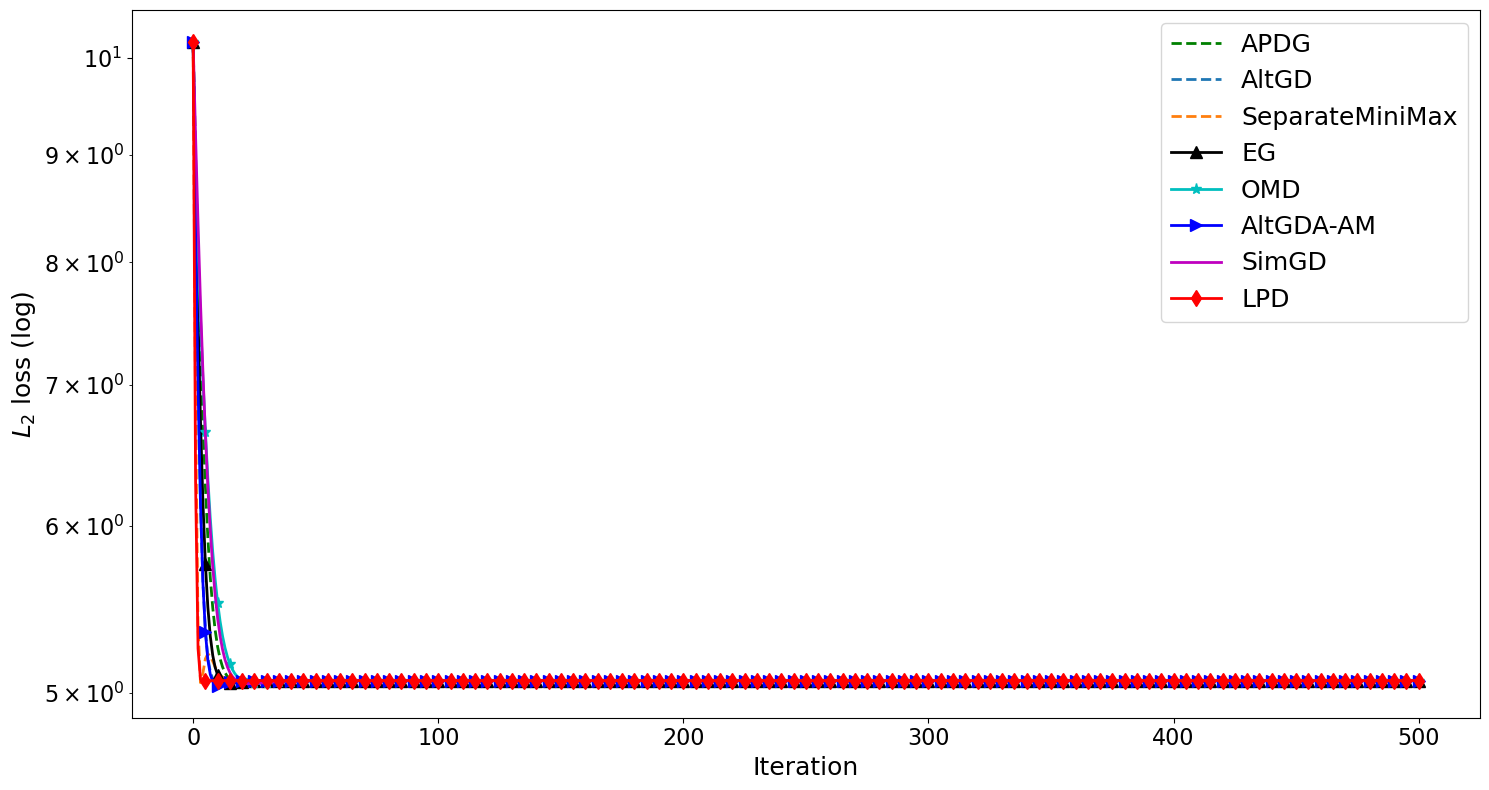

In [71]:
%matplotlib inline
plot_interval = 1
markevery=5
for method in methods_dict:
    if method not in []:
        plt.semilogy(np.arange(0, len(methods_dict[method]["loss_hist"])+plot_interval-1, plot_interval),
                     methods_dict[method]["loss_hist"][::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
plt.xlabel("Iteration")
plt.ylabel(r"$L_2$ loss (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Linear_loss_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Linear_loss_iter{iteration}_nx{nx}_ny{ny}.pdf"))

APDG 141.26088515709262
AltGD 141.26088515709262
SeparateMiniMax 141.26088515709262
EG 141.26088515709262
OMD 141.26088515709262
AltGDA-AM 141.26088515709262
SimGD 141.26088515709262
LPD 141.26088515709262


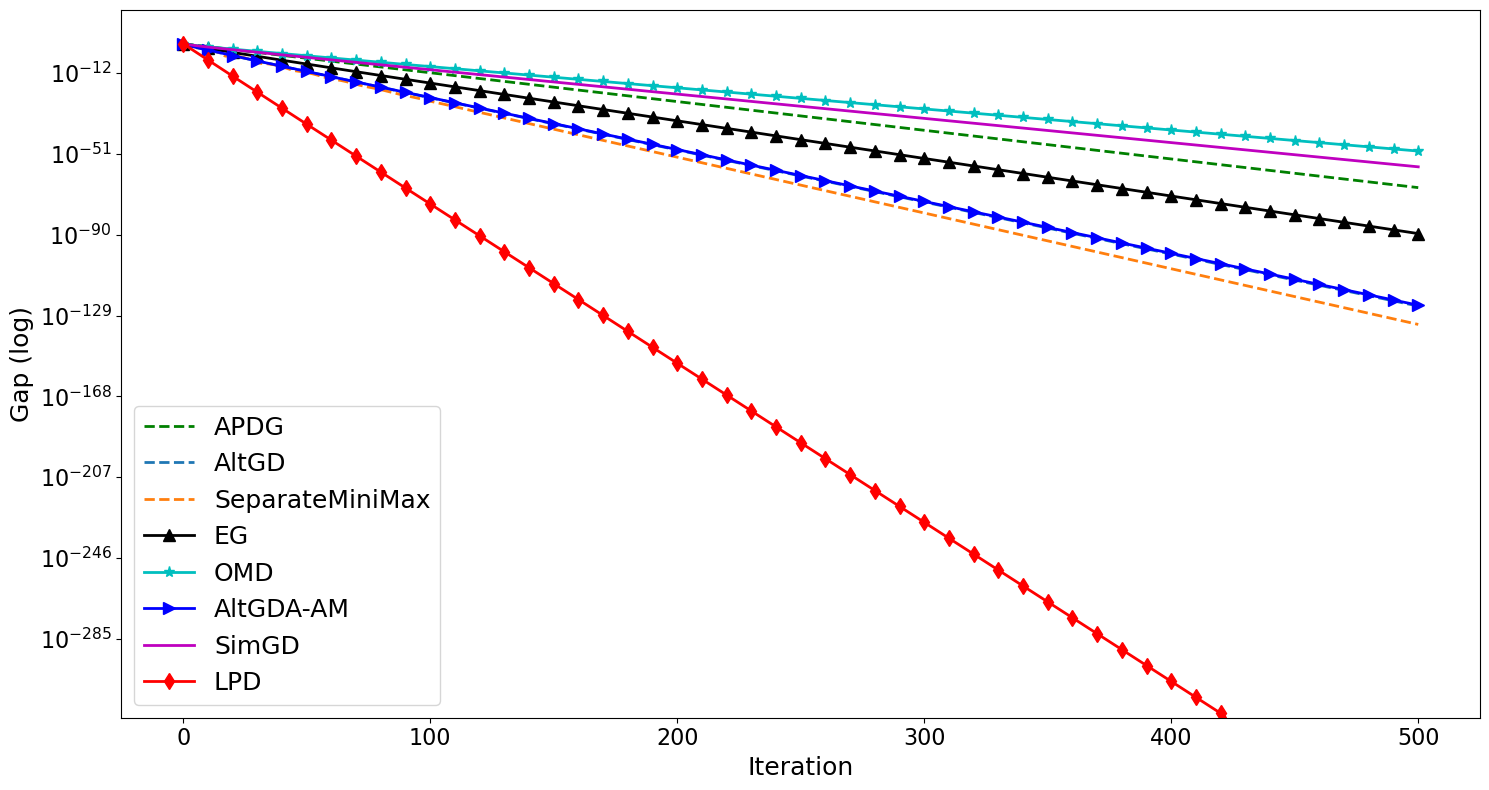

In [72]:
plot_interval = 1
markevery=10
for method in methods_dict:
    if method not in []:
        _gap =methods_dict[method]["class"].all_metrics["gap"]
        print(method, _gap[0])
        plt.semilogy(np.arange(0, len(_gap)+plot_interval-1, plot_interval),
                     _gap[::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
# plt.xscale('log')
plt.xlabel("Iteration")
plt.ylabel("Gap (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Linear_gap_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Linear_gap_iter{iteration}_nx{nx}_ny{ny}.pdf"))

# Non-symmetric case

In [61]:
nx=15
ny=100
problem = LinearRegression.with_parameters(nx=nx, ny=ny, L_x_mu_x=1, L_xy=0.5, mu_xy=0.05)

In [62]:
print(problem.L_xy, problem.mu_xy)

0.5000000000000001 3.5246591437259847e-10


In [63]:
print(problem.loss(np.ones(nx), -np.ones(ny)))
print(problem.xopt)
print(problem.yopt)

4.454375697606811
[-0.5342671  -0.28542637 -0.64071871  0.08848741  0.63151448  0.26327158
  0.68815217 -0.34293716 -0.19353874 -0.3656252  -0.32457811  0.24137009
 -0.77910377  0.05505679  0.76451676]
[-0.78552446  0.42929655 -0.11060228  0.4728364   0.17196312 -0.57692131
  0.06493918  1.15328772 -0.13226812 -0.74924254 -0.23073125  0.64587977
  0.57411641  1.4072138  -0.54705878  0.66719521 -0.66881603 -1.03007596
  0.19372114  0.88303196 -0.72126238  0.61878783  0.91245098  0.14983052
 -0.47821407 -0.51645076 -0.83055202 -0.17035063 -0.33332591  1.42308517
 -0.04733416 -0.60262724  0.2536306   0.76345959  0.96236643  0.06119641
 -0.44051473 -0.24598625 -0.95956372  0.24428219  0.57644562 -0.08320744
  2.08442563 -0.67653004  0.15793521  0.98741868  0.02488748 -0.38961625
 -0.42406265 -0.48879923 -0.40568385 -0.23729302  0.49083583  0.17549965
 -0.58359429  0.651372    0.52511602  0.90381054 -0.97283536 -0.25673932
 -1.67141055  0.13283628 -0.08333649 -0.83151919 -0.09757576  0.0358

In [64]:
params =  {"apdg": None,
          'lpd': None,
          'altgd': None,
          'simgd': None,
          # 'avg': None,
          'eg': None,
          'omd': None,
          'AA': None,
           "smm": None
         }

x0 = np.random.randn(nx, )
y0 = np.random.randn(ny, )
iteration = 500
methods_dict = ut.main(problem, iteration, x0.copy(), y0.copy(), params, eps=1e-15)

OMD: 100%|███████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 367.90it/s]


AltGDA-AM couldn't be used in such parameters' settings


LPD:  78%|███████████████████████████████████████████████████████████████████▋                   | 389/500 [00:00<00:00, 425.41it/s]C:\Users\Georgy\anaconda3\envs\pytorch_env\lib\site-packages\autograd\numpy\linalg.py:100: RuntimeWarning: invalid value encountered in double_scalars
  return expand(g / ans) * x
LPD: 100%|███████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 407.74it/s]


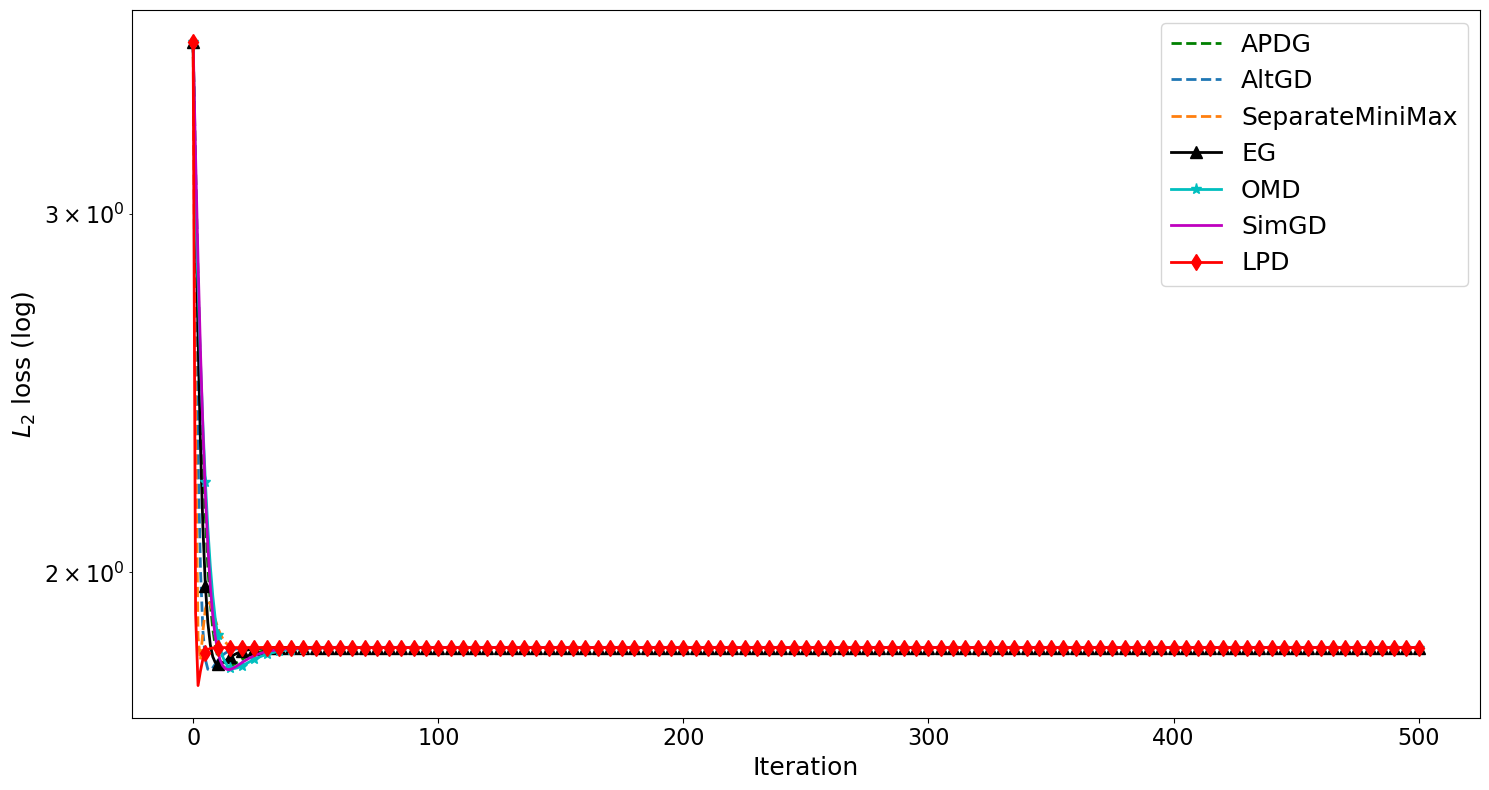

In [65]:
%matplotlib inline
plot_interval = 1
markevery=5
for method in methods_dict:
    if method not in []:
        plt.semilogy(np.arange(0, len(methods_dict[method]["loss_hist"])+plot_interval-1, plot_interval),
                     methods_dict[method]["loss_hist"][::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
plt.xlabel("Iteration")
plt.ylabel(r"$L_2$ loss (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Linear_loss_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Linear_loss_iter{iteration}_nx{nx}_ny{ny}.pdf"))

APDG 132.1498462504421
AltGD 132.1498462504421
SeparateMiniMax 132.1498462504421
EG 132.1498462504421
OMD 132.1498462504421
SimGD 132.1498462504421
LPD 132.1498462504421


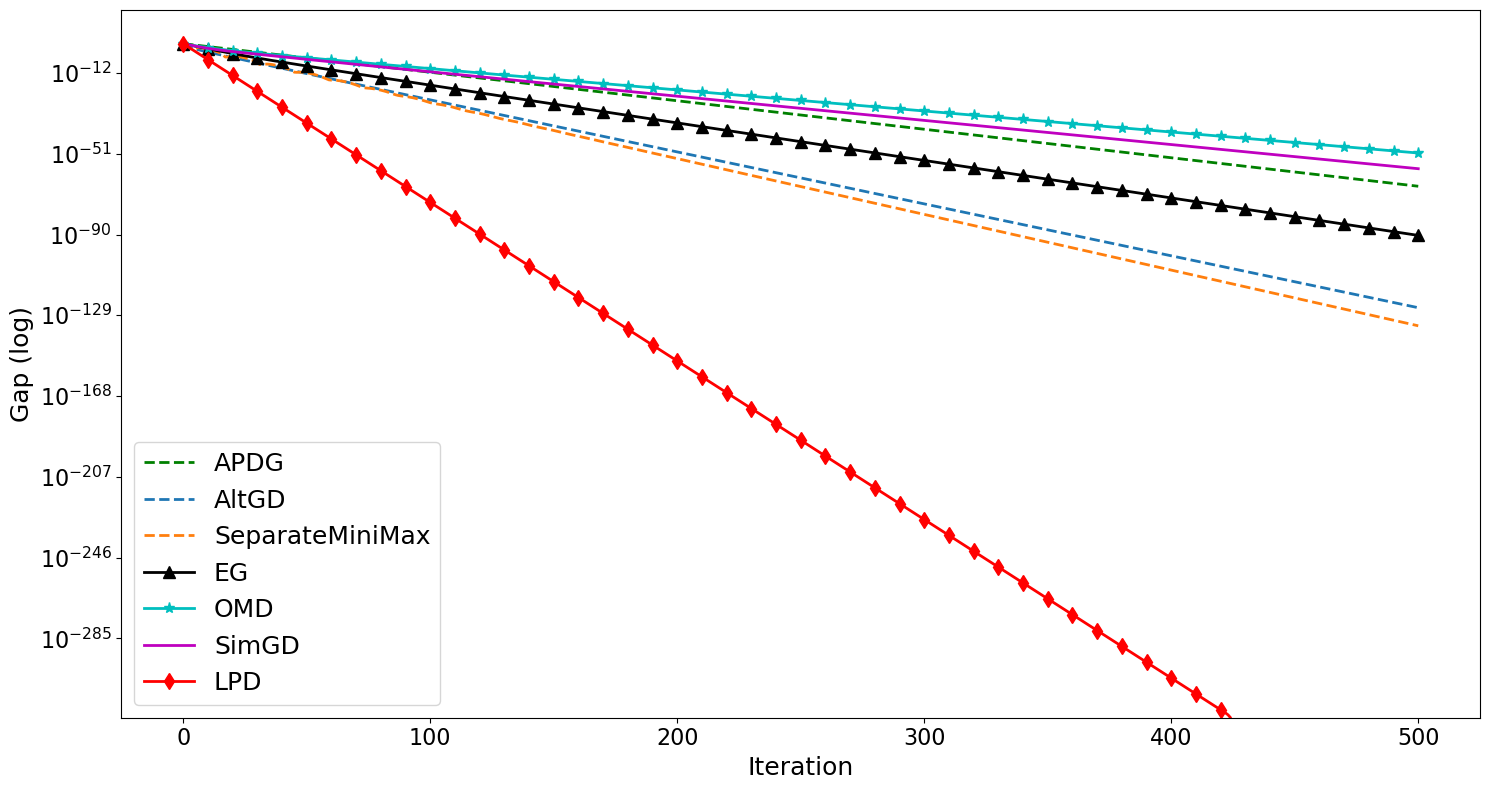

In [66]:
plot_interval = 1
markevery=10
for method in methods_dict:
    if method not in []:
        _gap =methods_dict[method]["class"].all_metrics["gap"]
        print(method, _gap[0])
        plt.semilogy(np.arange(0, len(_gap)+plot_interval-1, plot_interval),
                     _gap[::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
# plt.xscale('log')
plt.xlabel("Iteration")
plt.ylabel("Gap (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Linear_gap_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Linear_gap_iter{iteration}_nx{nx}_ny{ny}.pdf"))